In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [37]:
# Job overlap
path_dir = os.getcwd()+"/joboverlap/"
file_list = os.listdir(path_dir)
file_list.sort()



In [38]:
# df = pd.read_csv(path_dir+file_list[12], names=['iter','time']).drop('iter',axis = 1)
# cv = pd.merge(df, pd.read_csv(path_dir+file_list[11], names=['iter','time']).drop('iter',axis = 1), how='outer', left_index=True, right_index=True)
# print(cv)
# cv = cv.drop_duplicates()
# print(cv)

In [39]:
# df1 = pd.DataFrame([[1,1],[1,2],[2,3],[1,4],[3,5],[5,6]], columns= ['keys1', 'keys2'])
# print(df1)
# print(df1.drop_duplicates(["keys1"]))


In [40]:
csv_pd_data = []

csv_pd_data.append(pd.read_csv(path_dir+'job_time.csv', names=['iter','time']).drop('iter',axis=1))
for filename in file_list:
    if 'job' in filename:
        continue
    csv_pd_data.append(pd.read_csv(path_dir+filename, names=['iter','task']).drop('iter',axis=1))

cv = pd.merge(csv_pd_data[0], csv_pd_data[1], how='outer', left_index=True, right_index=True)
for i in range(len(csv_pd_data)-2):
    cv = pd.merge(cv, csv_pd_data[i+2], how='outer', left_index=True, right_index=True)
cv = cv.drop_duplicates(["time"])
cv.columns = ['time','0','1','2','3','4','5','6','7','8','9','10','11']
cv_ = cv[:1100]

SAVED!


<module 'matplotlib.pyplot' from '/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/matplotlib/pyplot.py'>

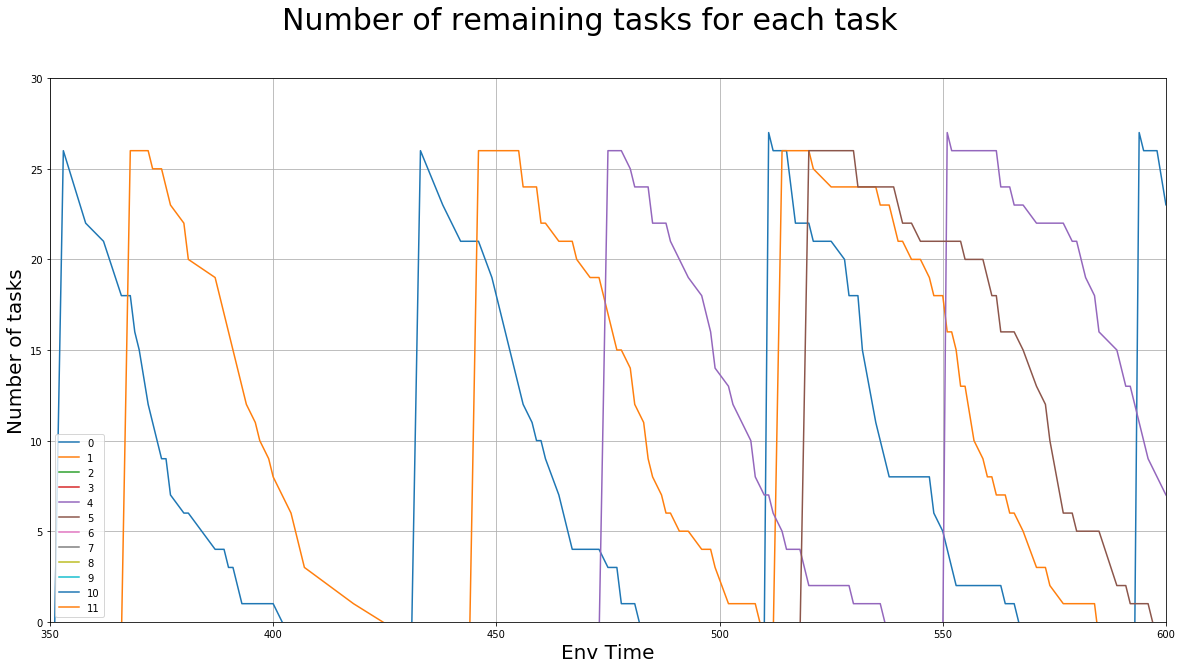

In [46]:
# for i in range(len(csv_pd_y_data)):
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
for i in range(12):
    ax.plot(cv_['time'], cv_[str(i)], label=str(i))
#     ax.plot(cv_['time'], cv_[str(i)], 'o', alpha = 0.3)

fig.suptitle("Number of remaining tasks for each task", fontsize = 30)
plt.xlabel('Env Time', fontsize=20)
plt.ylabel('Number of tasks', fontsize=20)
plt.xlim(350,600)
plt.ylim(0,30)
ax.grid()
ax.legend()

fig.savefig(os.getcwd()+'/joboverlap_plot.png')
print("SAVED!")
plt

SAVED!


<module 'matplotlib.pyplot' from '/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/matplotlib/pyplot.py'>

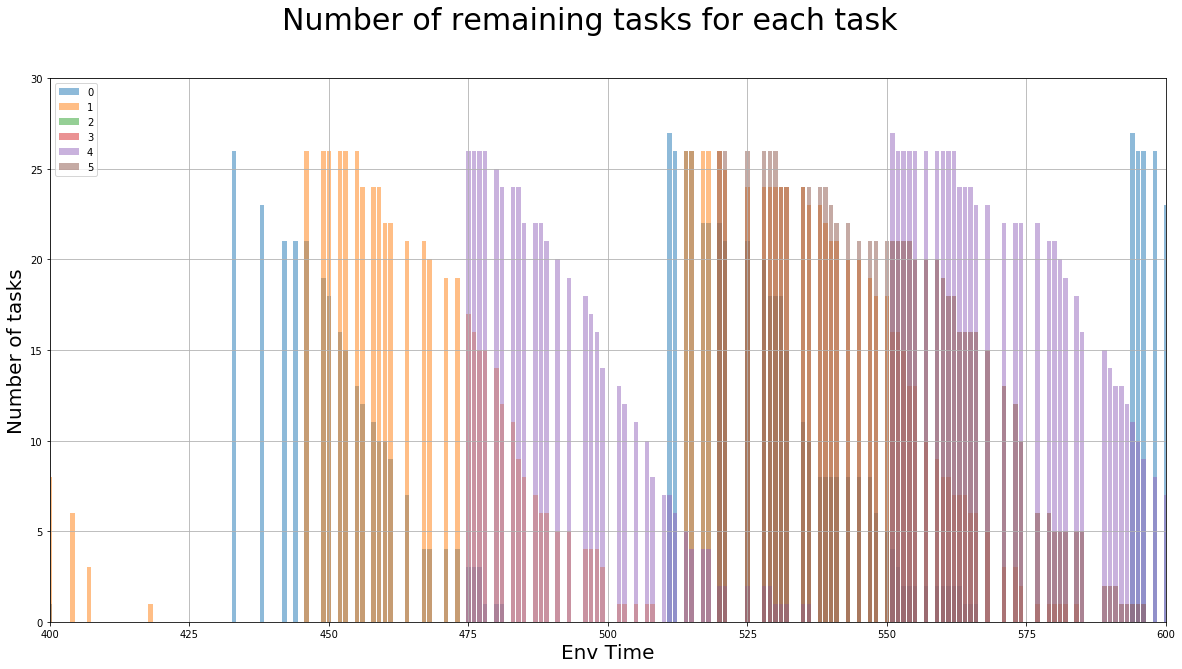

In [48]:

# for i in range(len(csv_pd_y_data)):
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
for i in range(6):
    ax.bar(cv_['time'], cv_[str(i)], alpha = 0.5, label=str(i))
#ax.plot(cv['time'], cv['1'], alpha = 0.5, label='1')
fig.suptitle("Number of remaining tasks for each task", fontsize = 30)
plt.xlabel('Env Time', fontsize=20)
plt.ylabel('Number of tasks', fontsize=20)
plt.xlim(400,600)
plt.ylim(0,30)
ax.grid()
ax.legend()

fig.savefig(os.getcwd()+'/joboverlap_bar.png')
print("SAVED!")
plt